In [ ]:
'''
Case Study
Domain – Retail/Fashion focus – Optimize sales

Business challenge/requirement

Fyntra is the largest online clothing company in USA. It sells clothing online, 
but they also have in-store style and clothing advice sessions. Customers come into the store, 
have sessions/meetings with a personal stylist, then can go home and order either on a mobile app or website 
for the clothes they want.

Company wants to decide whether to focus the effort on mobile app experience or its website. 
As a drastic measure it is also evaluating to shut down the website.

You as a ML expert in the team will help the company make the right decision

Key issues
Clearly establish a correlation among the parameters supplied in data

Considerations NONE

Data volume
Approx 500 records – file FyntraCustomerData.csv (All data is fake so do not worry about privacy)

Additional information - NA
Business benefits
Increase in profits as the focus on the optimal sales channel will result into the higher top line and the higher bottom line
       

1. Compute -- Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. 
Is there a correlation?

2. Compute – Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1st One?
3. Compute -- Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?
4. Compute – Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?
5. Compute – Train and Test the data and answer multiple questions -- What is the use of random_state=85?
6. Compute – Predict the data and do a scatter plot. Check if actual and predicted data match?
7. What is the value of Root Mean Squared Error?

'''

/Users/atul595525/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


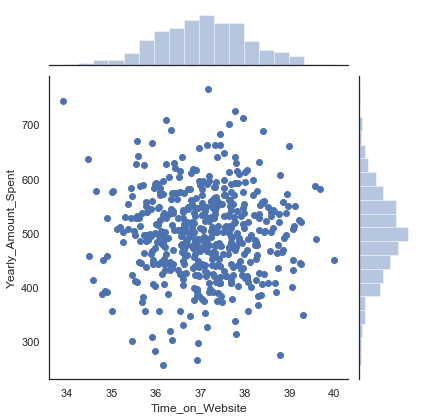

In [7]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


data='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_6_Introduction_to_Machine_Learning_with_Python/FyntraCustomerData.csv'

df=pd.read_csv(data)

df.head(5)

df_time_yr_amnt=df[['Time_on_Website','Yearly_Amount_Spent']]

df_time_yr_amnt.head(6)


#graph = sns.jointplot(x=df_time_yr_amnt.Time_on_Website, y=df_time_yr_amnt.Yearly_Amount_Spent, color='r')

sns.set(style="white", color_codes=True)
sns.jointplot(x="Time_on_Website",
              y="Yearly_Amount_Spent", data=df_time_yr_amnt)



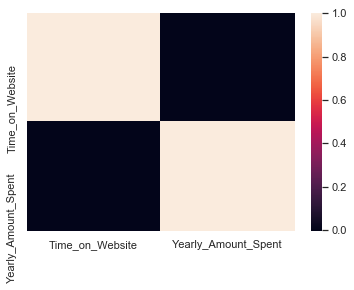

In [8]:
# Is there a correlation? : Both have strong correlation
coff_Time_Amount = df_time_yr_amnt.corr()
sns.heatmap(coff_Time_Amount)


/Users/atul595525/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


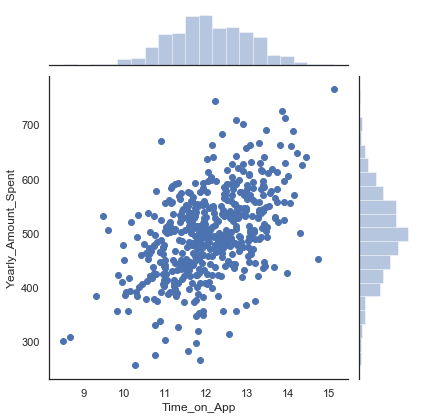

In [13]:
#2. Compute – Do the same as above but now with Time on App and Yearly Amount Spent. 
#Is this correlation stronger than 1st One?

df.head(4)


df_time_yr_amnt_App=df[['Time_on_App','Yearly_Amount_Spent']]

df_time_yr_amnt_App.head(6)


#graph = sns.jointplot(x=df_time_yr_amnt.Time_on_Website, y=df_time_yr_amnt.Yearly_Amount_Spent, color='r')

sns.set(style="white", color_codes=True)
sns.jointplot(x="Time_on_App",
              y="Yearly_Amount_Spent", data=df_time_yr_amnt_App)



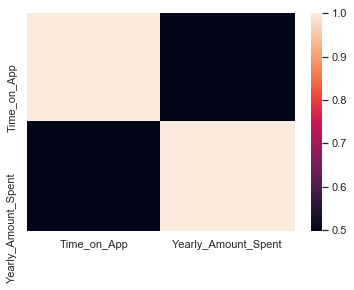

In [14]:
# Is there a correlation? : Both have strong correlation
coff_Time_Amount = df_time_yr_amnt_App.corr()
sns.heatmap(coff_Time_Amount)



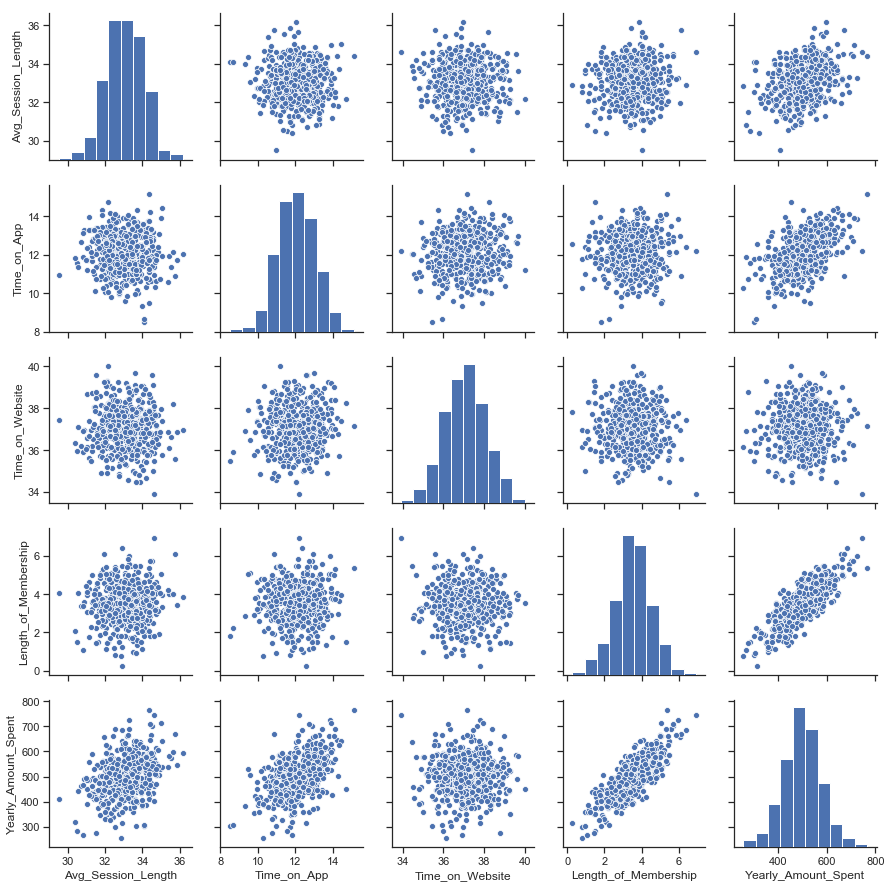

In [15]:
#3. Compute -- Explore types of relationships across the entire data set using pairplot . 
#Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)


In [17]:
# 4Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

X = df["Length_of_Membership"]
Y = df["Yearly_Amount_Spent"]
train_x, test_x, train_y, test_y = train_test_split(
    X, Y, random_state=85, test_size=0.3)




In [18]:
#5. Compute – Create linear model plot of Length of Membership and Yearly Amount Spent. 
#Does the data fits well in linear plot?

lin_model = LinearRegression()
lin_model.fit(pd.DataFrame(train_x), train_y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# 5.Compute –Train and Test the data and answer multiple questions --What is the use of random_state=85?
# The random_state splits a randomly selected data but with a twist.
# And the twist is the order of the data will be same for a particular value of random_state.
# You need to understand that it's not a bool accpeted value. starting from 0 to any integer no,
# if you pass as random_state,it'll be a permanent order for it.
# Ex: the order you will get in random_state=0 remain same. After that if you
# execuit random_state=5 and again come back to random_state=0 you'll get the same order.
# And like 0 for all integer will go same. How ever random_state=None splits randomly each time.


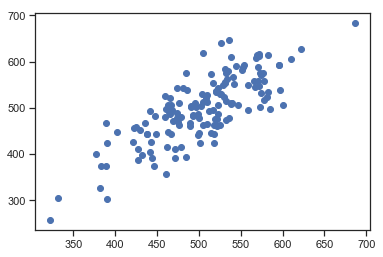

In [19]:
#6. Compute – Predict the data and do a scatter plot. Check if actual and predicted data match?

predicted_values = lin_model.predict(pd.DataFrame(test_x))

plt.scatter(predicted_values, test_y)
plt.show()


In [20]:
# 7.What is the value of Root Mean Squared Error?
rms = sqrt(mean_squared_error(test_y, predicted_values))
print(rms)

44.777320711114676
